# Exploring Thomas Fire Using California Fire Perimeter data

**Author**: Kat Le

**Github Repository**: https://github.com/katleyq/eds220-hwk4

## About this notebook

This notebook contains 


California Fire Perimeter source: https://catalog.data.gov/dataset/california-fire-perimeters-all-b3436


### Import libraries and load data

In [2]:
import os
import pandas as pd # To work with data frames
import geopandas as gpd # To maniplate spatial data frames
from shapely.geometry import box  # To create polygon bounding box
import matplotlib.pyplot as plt # To plot spatial data
from matplotlib_scalebar.scalebar import ScaleBar # for map scalebar
import matplotlib.patches as mpatches # for map legend
from matplotlib.offsetbox import AnchoredText # for map compass

"""
Set environment variable 'PROJ_LIB' to specify the path for the PROJ library
Resolves ERROR 1: PROJ: proj_create_from_database
"""""
os.environ['PROJ_LIB'] = '/opt/anaconda3/share/proj'

# Set options to display all columns when viewing
pd.set_option("display.max.columns", None)

### Read in California Fire Perimeter spatial data

In [3]:
# Create path to repository data folder
data_folder_fp = os.path.join(#'/',
                              #'Users',
                              #'katherine', 
                              #'MEDS',
                              #'EDS-220',
                              #'eds220-hwk4',
                              'data')

# Load California Fire Perimeter shapefile
df = gpd.read_file(f"{data_folder_fp}/California_Fire_Perimeters/California_Fire_Perimeters.shp")

### Fire Perimeter Data Exploration


In [3]:
df.head()

,YEAR_,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,CAUSE,C_METHOD,OBJECTIVE,GIS_ACRES,COMMENTS,COMPLEX_NA,IRWINID,FIRE_NUM,COMPLEX_ID,DECADES,geometry
0,2023,CA,CDF,SKU,WHITWORTH,00004808,2023-06-17,2023-06-17,5,1,1,5.72913,None,None,{7985848C-0AC2-4BA4-8F0E-29F778652E61},None,None,2020,"POLYGON ((-13682443.000 5091132.739, -13682445..."
1,2023,CA,LRA,BTU,KAISER,00010225,2023-06-02,2023-06-02,5,1,1,13.60240,None,None,{43EBCC88-B3AC-48EB-8EF5-417FE0939CCF},None,None,2020,"POLYGON ((-13576727.142 4841226.161, -13576726..."
2,2023,CA,CDF,AEU,JACKSON,00017640,2023-07-01,2023-07-02,2,1,1,27.81450,None,None,{B64E1355-BF1D-441A-95D0-BC1FBB93483B},None,None,2020,"POLYGON ((-13459243.000 4621236.000, -13458968..."
3,2023,CA,CDF,AEU,CARBON,00018821,2023-07-11,2023-07-11,9,1,1,58.76020,None,None,{CB41DB0A-E4B1-489D-A4EA-738F2CD6DB3B},None,None,2020,"POLYGON ((-13468077.000 4642260.000, -13467975..."
4,2023,CA,CDF,AEU,LIBERTY,00018876,2023-07-11,2023-07-12,14,1,1,70.97900,None,None,{F83F70A4-07A7-40B8-BD51-10CCC1C30D63},None,None,2020,"POLYGON ((-13468418.000 4614853.000, -13468428..."


In [4]:
df.crs

<Projected CRS: PROJCS["WGS_1984_Web_Mercator_Auxiliary_Sphere",GE ...>
Name: WGS_1984_Web_Mercator_Auxiliary_Sphere
Axis Info [cartesian]:
- [east]: Easting (Meter)
- [north]: Northing (Meter)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [5]:
df.shape

(22261, 19)

### Thomas Fire Boundary

In [6]:
thomas_fire = df.loc[(df['FIRE_NAME'] == 'THOMAS') & (df['YEAR_'] == 2017)]

Text(0.5, 1.0, '2017 Thomas Fire Boundary')

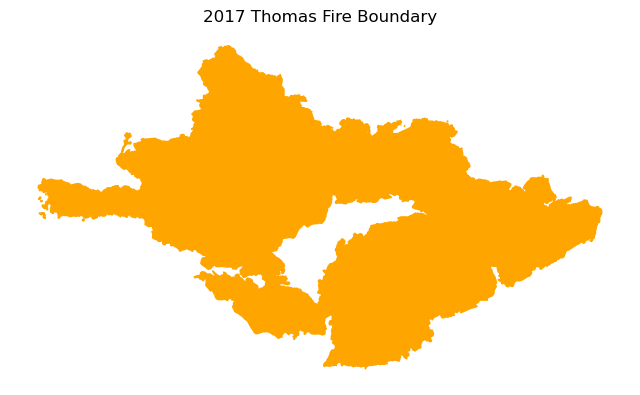

In [19]:
# Initialize plot
fig, ax = plt.subplots(figsize=(8, 6))

# Turn off the axes
ax.axis('off')

# Plot the GeoDataFrame with the desired styling
thomas_fire.plot(ax=ax, color='orange', edgecolor='orange')

ax.set_title('2017 Thomas Fire Boundary')


In [8]:
thomas_fire

,YEAR_,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,CAUSE,C_METHOD,OBJECTIVE,GIS_ACRES,COMMENTS,COMPLEX_NA,IRWINID,FIRE_NUM,COMPLEX_ID,DECADES,geometry
2654,2017,CA,USF,VNC,THOMAS,00003583,2017-12-04,2018-01-12,9,7,1,281791.0,CONT_DATE based on Inciweb,None,None,None,None,2010,"MULTIPOLYGON (((-13316089.016 4088553.040, -13..."


In [9]:
# Save file to data folder
# thomas_fire.to_file('data/thomas_fire.geojson', driver = 'GeoJSON')
thomas_fire.to_file('data/thomas_fire.shp')

I decided to save the Thomas Fire Boundary as a shapefile.